# WeatherPy
----

### Analysis
* By Thinh Nguyen
* According to the latitude vs max temperature graph, there a clustering of around 80 degree F near the Equator for 1/11/2019.
* There is a clustering of 100% humidity near the equator for 1/11/2019.
* Theres a trend of wind speeds be faster when they are further from the equator on 1/11/2019.


---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

#Creates Dataframe with the cities and empty columns for different parameters.
CityWeather = pd.DataFrame({'City':cities})
CityWeather['Cloudiness']=""
CityWeather['Country']=""
CityWeather['Date']=""
CityWeather['Humidity']=""
CityWeather['Lat']=""
CityWeather['Lng']=""
CityWeather['Max Temp']=""
CityWeather['Wind Speed']=""
CityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ahipara,,,,,,,,
1,marienburg,,,,,,,,
2,upernavik,,,,,,,,
3,darnah,,,,,,,,
4,bur gabo,,,,,,,,


In [4]:

settings = {"units": "imperial", "appid": api_key}


print("Beginning Data Retrieval")
print("-------------------------------------------")
Summary = ["clouds.all","sys.country","dt","main.humidity","coord.lat","coord.lon","main.temp_max","wind.speed"]
#Counts up number of records.
RecordCount=1

#Loops through cities. and adds corresponding information for each city.
for city in cities:
    
    try:
       
        CurrentW=owm.get_current(city, **settings)
        print(f"Processing Record {RecordCount} | {city}")
        RecordCount+=1
        Data=CurrentW(*Summary)
    
        TimeObj=time.localtime(Data[2])
        CurrentDate=f'{TimeObj.tm_mon}/{TimeObj.tm_mday}/{TimeObj.tm_year}'
    
        CityWeather.loc[CityWeather['City']==city,'Cloudiness']=Data[0]
        CityWeather.loc[CityWeather['City']==city,'Country']=Data[1]
        CityWeather.loc[CityWeather['City']==city,'Date']=CurrentDate
        CityWeather.loc[CityWeather['City']==city,'Humidity']=Data[3]
        CityWeather.loc[CityWeather['City']==city,'Lat']=Data[4]
        CityWeather.loc[CityWeather['City']==city,'Lng']=Data[5]
        CityWeather.loc[CityWeather['City']==city,'Max Temp']=Data[6]
        CityWeather.loc[CityWeather['City']==city,'Wind Speed']=Data[7]
    except :
        print(f'{city} not found. Skipping...')
    

Beginning Data Retrieval
-------------------------------------------
Processing Record 1 | ahipara
Processing Record 2 | marienburg
Processing Record 3 | upernavik
Processing Record 4 | darnah
bur gabo not found. Skipping...
Processing Record 5 | albany
Processing Record 6 | ushuaia
Processing Record 7 | punta arenas
Processing Record 8 | novouzensk
Processing Record 9 | gumdag
Processing Record 10 | esperance
Processing Record 11 | dikson
Processing Record 12 | bulawayo
Processing Record 13 | dongobesh
Processing Record 14 | chino
Processing Record 15 | kodiak
Processing Record 16 | norman wells
Processing Record 17 | iberia
Processing Record 18 | bredasdorp
Processing Record 19 | cubuk
Processing Record 20 | barrow
Processing Record 21 | jalu
Processing Record 22 | pionerskiy
rungata not found. Skipping...
Processing Record 23 | hobart
Processing Record 24 | hermanus
Processing Record 25 | jamestown
Processing Record 26 | bunbury
Processing Record 27 | tual
taolanaro not found. Skipp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
CityWeather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ahipara,56.0,NZ,1/11/2019,63.0,-35.17,173.16,74.36,8.41
1,marienburg,75.0,DE,1/11/2019,93.0,52.12,9.98,42.80,13.87
2,upernavik,32.0,GL,1/11/2019,100.0,72.79,-56.15,-3.94,10.98
3,darnah,100.0,LY,1/11/2019,100.0,32.77,22.64,59.51,20.49
4,bur gabo,NaN,,,NaN,NaN,NaN,NaN,NaN


In [22]:
#Converts strings to numeric, if the cell is a number.
CityWeather=CityWeather.apply(pd.to_numeric,errors='ignore')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

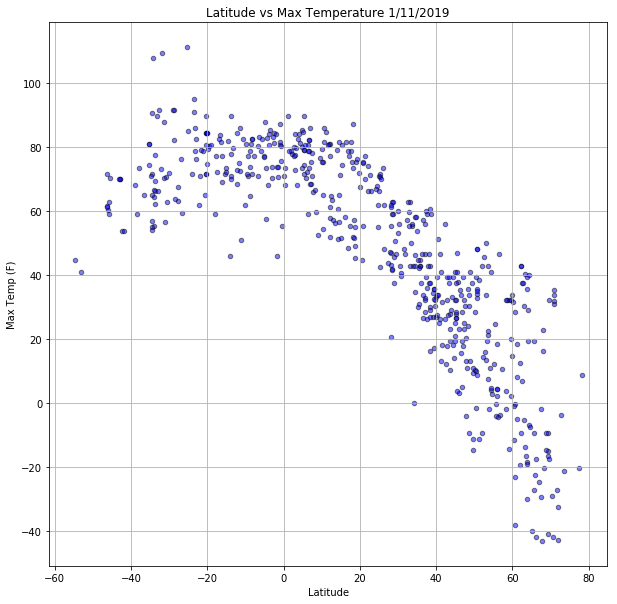

In [23]:
#Plots out he Latitude vs Temperature plot.
ax=CityWeather.plot(kind='Scatter',x='Lat',y='Max Temp',marker='o',color='blue',alpha=.5,figsize=(10,10),edgecolors='black')
ax.grid()
ax.set_title(f'Latitude vs Max Temperature {CurrentDate}')
ax.set_ylabel('Max Temp (F)')
ax.set_xlabel('Latitude')
fig=ax.get_figure();
fig.savefig("LatVSTempPlot.png")

#### Latitude vs. Humidity Plot

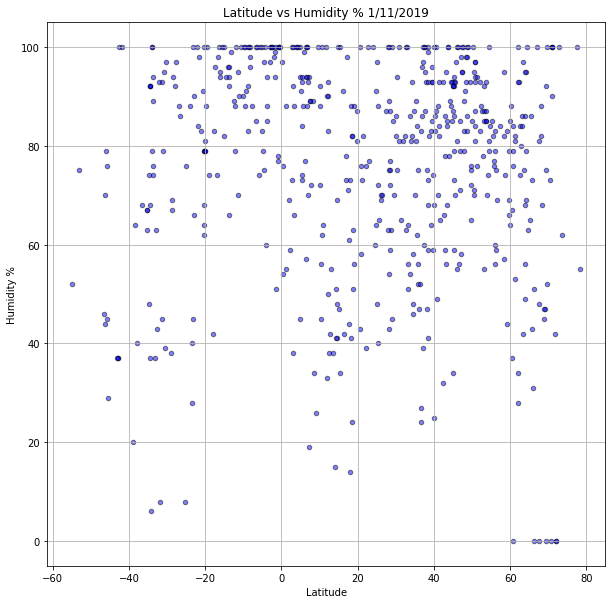

In [24]:

# Plots out the Latitude vs Humidity chart.
bx=CityWeather.plot(kind='Scatter',x='Lat',y='Humidity',marker='o',color='blue',alpha=.5,figsize=(10,10),edgecolors='black')
bx.grid()
bx.set_title(f'Latitude vs Humidity % {CurrentDate}')
bx.set_ylabel('Humidity %')
bx.set_xlabel('Latitude')
fig=bx.get_figure();
fig.savefig("LatVSHumidityPlot.png")

#### Latitude vs. Cloudiness Plot

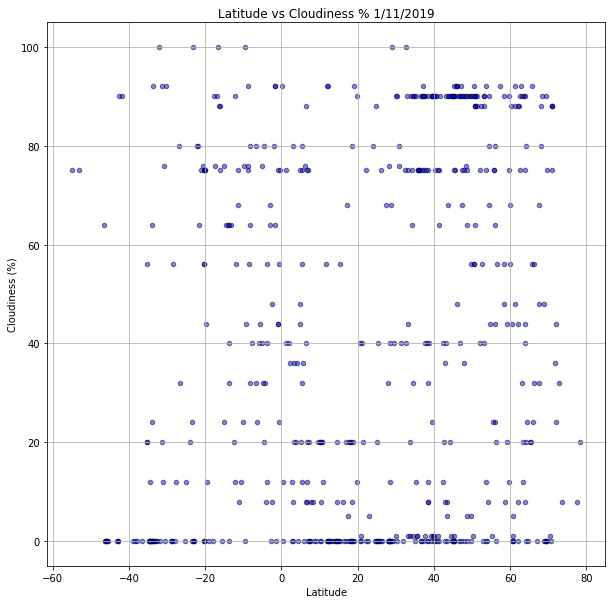

In [25]:
cx=CityWeather.plot(kind='Scatter',x='Lat',y='Cloudiness',marker='o',color='blue',alpha=.5,figsize=(10,10),edgecolors='black')
cx.grid()
cx.set_title(f'Latitude vs Cloudiness % {CurrentDate}')
cx.set_ylabel('Cloudiness (%)')
cx.set_xlabel('Latitude')
fig=cx.get_figure();
fig.savefig("LatVSCloudinessPlot.png")

#### Latitude vs. Wind Speed Plot

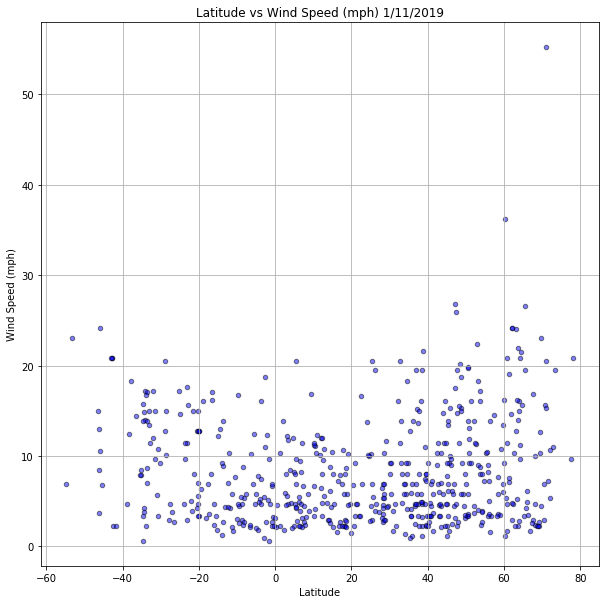

In [26]:
dx=CityWeather.plot(kind='Scatter',x='Lat',y='Wind Speed',marker='o',color='blue',alpha=.5,figsize=(10,10),edgecolors='black')
dx.grid()
dx.set_title(f'Latitude vs Wind Speed (mph) {CurrentDate}')
dx.set_ylabel('Wind Speed (mph)')
dx.set_xlabel('Latitude')
fig=dx.get_figure();
fig
fig.savefig("LatVSWindSpeedPlot.png")